In [409]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as pltimport 
import pandas as pd

In [410]:
import numpy as np
import pandas as pd

def preprocess_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df != "******").all(axis=1)]
    
    col_map = {
        "długośćmm": "dlugoscmm",
        "szerokośćmm": "szerokoscmm",
        "kąt": "kat",
        "obwódmm": "obwodmm",
        "średnica_fereta_hmm": "srednica_fereta_hmm",
        "średn._martinamm": "sredn._martinamm",
        "średn._sitowamm": "sredn._sitowamm",
        "średnia_jaskrawość": "srednia_jaskrawosc"
    }

    if "długośćmm" in df.columns:
        df = df.rename(columns=col_map)
        if "szerokoscmm" in df.columns:
            df["szerokoscmm"] = df["szerokoscmm"].astype(np.float64)

    return df


In [411]:
import os
import pandas as pd

def load_dfs_from_path(path="example"):

    combined_df = []

    for entry in os.scandir(path):  
        if entry.is_file() and entry.name.endswith(".csv"):
            df = pd.read_csv(entry.path)
            df = preprocess_df(df)
            combined_df.append(df)

    combined_df = pd.concat(combined_df, ignore_index=True)

    return combined_df

In [ ]:
# df = pd.read_csv("a1_raport_no_model.csv")
# df = pd.read_csv("raport_a1.csv")
df = load_dfs_from_path("data")
# df = load_dfs_from_path("predicted_data")
df = preprocess_df(df)

In [413]:
df['dlugoscmm'] = df['dlugoscmm']/1.49
df['szerokoscmm'] = df['szerokoscmm']/1.49
df['powierzchniamm'] = df['powierzchniamm']/2.235

df = df[df['dlugoscmm'] >= 0.2]
df = df[df['szerokoscmm'] <= 1.5]

# filtering the things that with high probability are not bacteria
df = df[df['dlugoscmm'] >= 0.2]
df = df[df['szerokoscmm'] <= 1.5]

df['Pw'] = 3.14*(df['szerokoscmm']/2)**2+df['szerokoscmm']*(df['dlugoscmm']-df['szerokoscmm'])
df['R'] = df['Pw'] / df['powierzchniamm']
df['Dk'] = df['dlugoscmm']
df['Sk'] = df['szerokoscmm']
df['D/S'] = (df['Dk'] / df['Sk']).astype('float64')

In [414]:
df.head()

,nr.,xpix.,ypix.,xmm,ymm,powierzchniamm,dlugoscmm,szerokoscmm,kat,obwodmm,...,b,y,liczenie_obiektow_w,udzial_punktow,pole_obrazu_mm2,Pw,R,Dk,Sk,D/S
0,1,950.5,937.5,95.1,93.8,0.487696,1.275168,0.201342,62.64,4.804163,...,144.2,119.6,1,12.0,10.9,0.248029,0.508574,1.275168,0.201342,6.333333
1,2,1116.5,910.5,111.7,91.1,0.299776,0.805369,0.335570,12.62,3.214214,...,171.1,140.7,1,9.2,8.9,0.246047,0.820770,0.805369,0.335570,2.400000
2,3,760.5,845.5,76.0,84.6,0.241611,0.536913,0.402685,69.63,2.731371,...,131.4,110.9,1,9.2,7.3,0.181343,0.750559,0.536913,0.402685,1.333333
3,4,445.5,830.5,44.6,83.1,0.152125,0.536913,0.536913,106.00,2.497056,...,130.4,106.1,1,7.2,6.3,0.226296,1.487564,0.536913,0.536913,1.000000
4,5,1068.5,789.5,106.9,79.0,0.407159,0.939597,0.469799,70.47,4.038478,...,173.7,146.1,1,10.7,10.2,0.393969,0.967605,0.939597,0.469799,2.000000


In [415]:
x1= df['dlugoscmm'].values
x2= df['szerokoscmm'].values
x3= df['powierzchniamm'].values
X = np.array(list(zip(x1, x2, x3))).reshape(len(x1), 3)

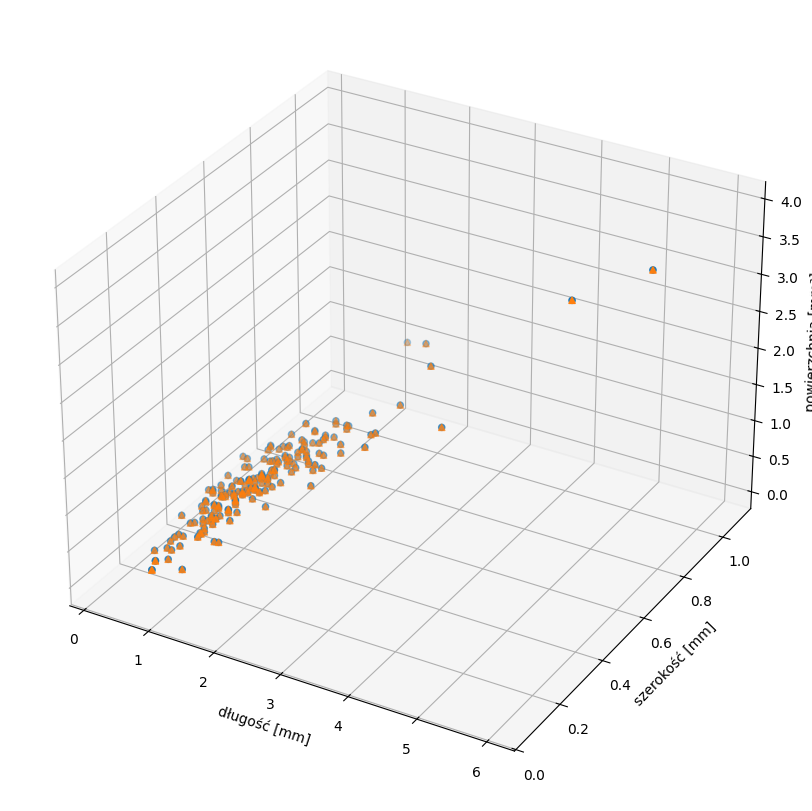

In [416]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax = fig.add_subplot(projection='3d')

for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = x1
    ys = x2
    zs = x3
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('długość [mm]')
ax.set_ylabel('szerokość [mm]')
ax.set_zlabel('powierzchnia [mm²]')

plt.show()


In [417]:
df.head()

,nr.,xpix.,ypix.,xmm,ymm,powierzchniamm,dlugoscmm,szerokoscmm,kat,obwodmm,...,b,y,liczenie_obiektow_w,udzial_punktow,pole_obrazu_mm2,Pw,R,Dk,Sk,D/S
0,1,950.5,937.5,95.1,93.8,0.487696,1.275168,0.201342,62.64,4.804163,...,144.2,119.6,1,12.0,10.9,0.248029,0.508574,1.275168,0.201342,6.333333
1,2,1116.5,910.5,111.7,91.1,0.299776,0.805369,0.335570,12.62,3.214214,...,171.1,140.7,1,9.2,8.9,0.246047,0.820770,0.805369,0.335570,2.400000
2,3,760.5,845.5,76.0,84.6,0.241611,0.536913,0.402685,69.63,2.731371,...,131.4,110.9,1,9.2,7.3,0.181343,0.750559,0.536913,0.402685,1.333333
3,4,445.5,830.5,44.6,83.1,0.152125,0.536913,0.536913,106.00,2.497056,...,130.4,106.1,1,7.2,6.3,0.226296,1.487564,0.536913,0.536913,1.000000
4,5,1068.5,789.5,106.9,79.0,0.407159,0.939597,0.469799,70.47,4.038478,...,173.7,146.1,1,10.7,10.2,0.393969,0.967605,0.939597,0.469799,2.000000


In [418]:
# x1= df['R'].values
# x2= df['D/S'].values
x1= df['dlugoscmm'].values
x2= df['szerokoscmm'].values
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

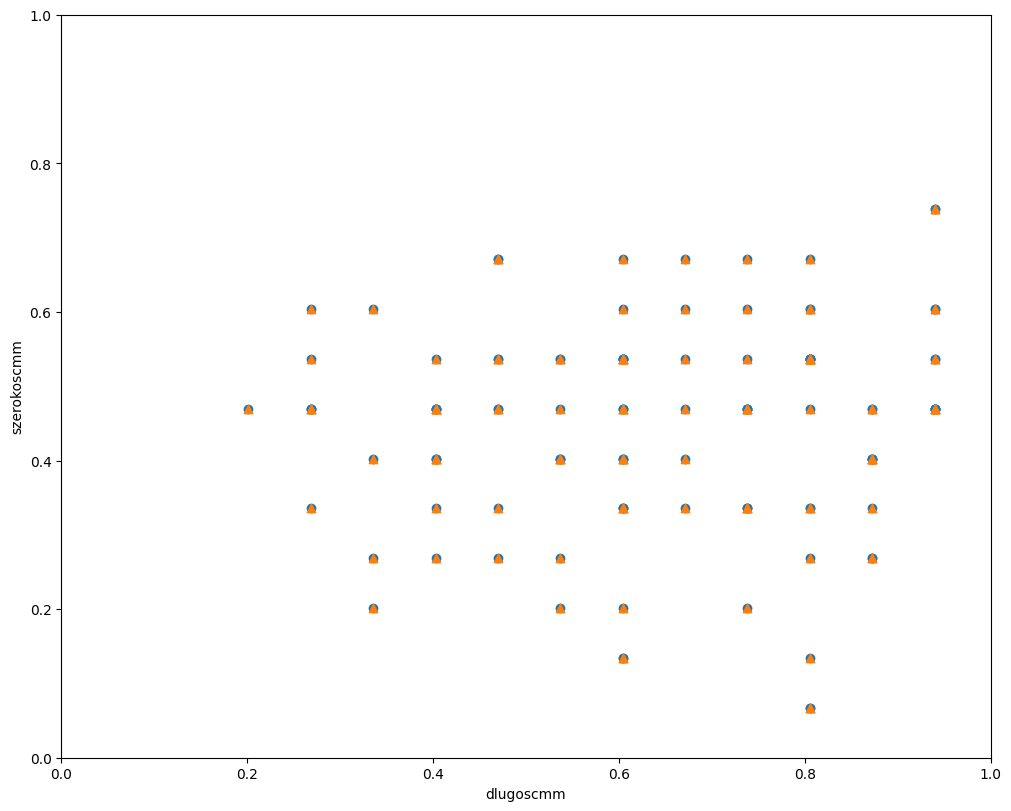

In [419]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax = fig.add_subplot()  # 2D axes

for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = x1
    ys = x2
    ax.scatter(xs, ys, marker=m)

# ax.set_xlabel('R')
# ax.set_ylabel('D/S')
ax.set_xlabel('dlugoscmm')
ax.set_ylabel('szerokoscmm')


# ax.axvline(x=1.2, color="red", linestyle="--", label="R = 1.5")
# ax.hlines(y=1.5, xmin=ax.get_xlim()[0], xmax=1.2, 
#           colors="blue", linestyles="--", label="D/S = 1.5")

# ax.set_xlim(0, 1.7)
# ax.set_ylim(0, 7.5)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()